In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
df = pd.read_csv("./resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [331]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
146333,2023-02,YISHUN,5 ROOM,347A,YISHUN AVE 11,13 TO 15,112.0,DBSS,2013,89 years 09 months,838888.0
146334,2023-02,YISHUN,5 ROOM,785,YISHUN AVE 2,10 TO 12,121.0,Improved,1988,64 years 04 months,610000.0
146335,2023-02,YISHUN,5 ROOM,336C,YISHUN ST 31,07 TO 09,112.0,Improved,2015,91 years 11 months,630000.0
146336,2023-02,YISHUN,5 ROOM,513D,YISHUN ST 51,07 TO 09,120.0,3Gen,2018,94 years 02 months,738000.0
146337,2023-02,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,68 years 05 months,1068000.0


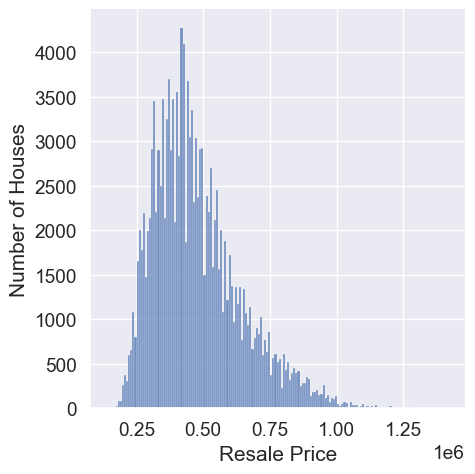

In [332]:
#Visualise resale prices
sns.displot(df['resale_price']).set(xlabel="Resale Price", ylabel="Number of Houses")

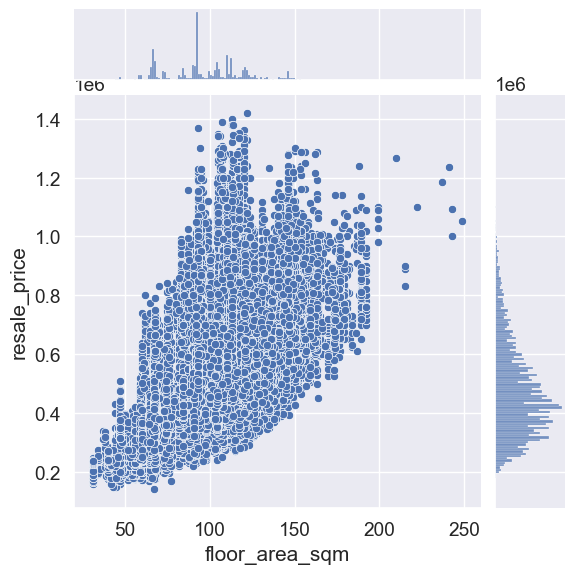

In [333]:
sns.jointplot(x=df["floor_area_sqm"], y=df["resale_price"])

<AxesSubplot: xlabel='count', ylabel='storey_range'>

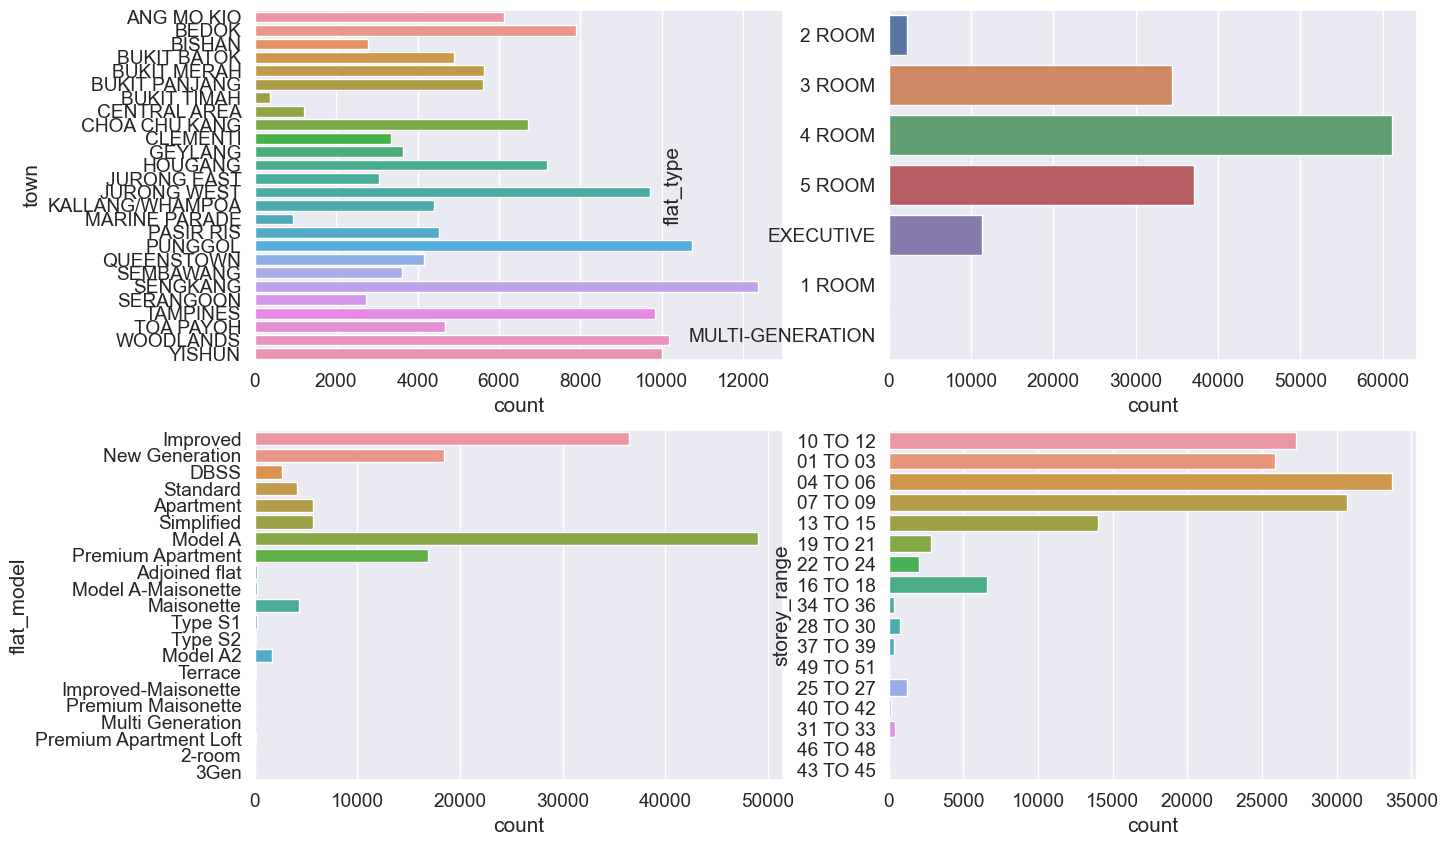

In [334]:
#Visualise other features
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 2, 1)
sns.countplot(y=df["town"])
fig.add_subplot(2, 2, 2)
sns.countplot(y=df["flat_type"])
fig.add_subplot(2, 2, 3)
sns.countplot(y=df["flat_model"])
fig.add_subplot(2, 2, 4)
sns.countplot(y=df["storey_range"])


In [335]:
df['date'] = pd.to_datetime(df["month"])
df['date']

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
146333   2023-02-01
146334   2023-02-01
146335   2023-02-01
146336   2023-02-01
146337   2023-02-01
Name: date, Length: 146338, dtype: datetime64[ns]

In [336]:
#Feature Engineering
df['month'] = df['date'].apply(lambda date: date.month)
df['year'] = df['date'].apply(lambda date: date.year)

In [337]:
towns = {}
for i, town in enumerate(df['town'].unique()):
    towns[town] = i + 1
towns

{'ANG MO KIO': 1,
 'BEDOK': 2,
 'BISHAN': 3,
 'BUKIT BATOK': 4,
 'BUKIT MERAH': 5,
 'BUKIT PANJANG': 6,
 'BUKIT TIMAH': 7,
 'CENTRAL AREA': 8,
 'CHOA CHU KANG': 9,
 'CLEMENTI': 10,
 'GEYLANG': 11,
 'HOUGANG': 12,
 'JURONG EAST': 13,
 'JURONG WEST': 14,
 'KALLANG/WHAMPOA': 15,
 'MARINE PARADE': 16,
 'PASIR RIS': 17,
 'PUNGGOL': 18,
 'QUEENSTOWN': 19,
 'SEMBAWANG': 20,
 'SENGKANG': 21,
 'SERANGOON': 22,
 'TAMPINES': 23,
 'TOA PAYOH': 24,
 'WOODLANDS': 25,
 'YISHUN': 26}

In [338]:
flat_type = {}
for i, flattype in enumerate(df['flat_type'].unique()):
    flat_type[flattype] = i + 1
flat_type

{'2 ROOM': 1,
 '3 ROOM': 2,
 '4 ROOM': 3,
 '5 ROOM': 4,
 'EXECUTIVE': 5,
 '1 ROOM': 6,
 'MULTI-GENERATION': 7}

In [339]:
flat_model = {}
for i, model in enumerate(df['flat_model'].unique()):
    flat_model[model] = i + 1
flat_model

{'Improved': 1,
 'New Generation': 2,
 'DBSS': 3,
 'Standard': 4,
 'Apartment': 5,
 'Simplified': 6,
 'Model A': 7,
 'Premium Apartment': 8,
 'Adjoined flat': 9,
 'Model A-Maisonette': 10,
 'Maisonette': 11,
 'Type S1': 12,
 'Type S2': 13,
 'Model A2': 14,
 'Terrace': 15,
 'Improved-Maisonette': 16,
 'Premium Maisonette': 17,
 'Multi Generation': 18,
 'Premium Apartment Loft': 19,
 '2-room': 20,
 '3Gen': 21}

In [340]:
df['flat_type'] = df['flat_type'].replace(flat_type, regex=True)
df['town'] = df['town'].replace(towns, regex=True)
df['flat_model'] = df['flat_model'].replace(flat_model, regex=True)
df['storey_range'] = df['storey_range'].apply(lambda x: x[:2])
df['remaining_lease'] = df['remaining_lease'].apply(lambda x: x[:2])

/var/folders/89/wy7_qkjn4dz1y9trj8f2mmvw0000gn/T/ipykernel_659/244325695.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

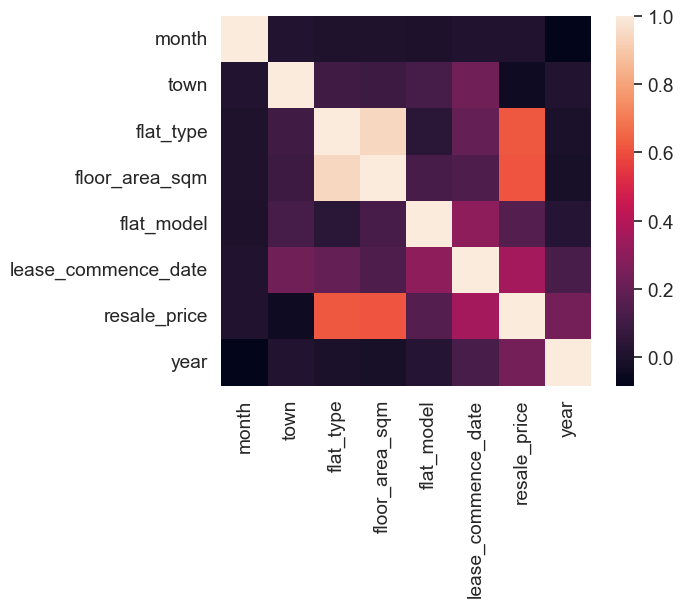

In [341]:
corr = df.corr()
sns.heatmap(corr, square=True)

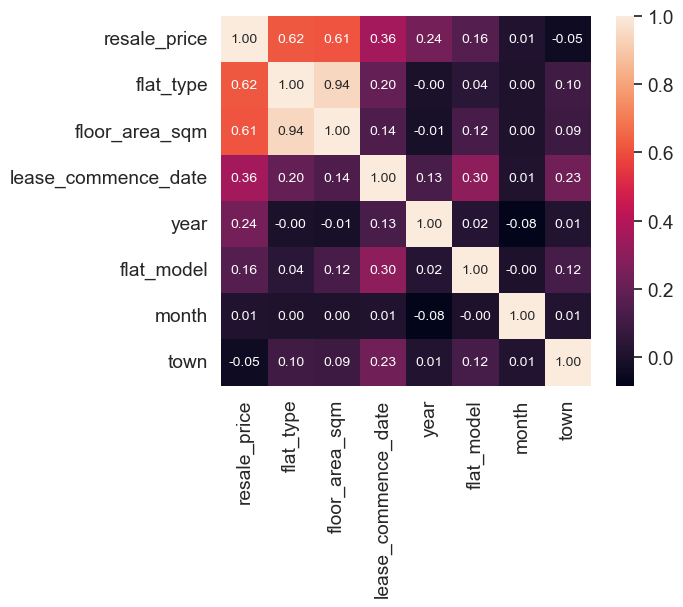

In [342]:
k = len(df.columns)  #number of variables for heatmap
cols = corr.nlargest(k, 'resale_price')['resale_price'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

In [343]:
#Drop features
df = df.drop("month", axis=1)
df = df.drop("street_name", axis=1)
df = df.drop("block", axis=1)
df = df.drop('date', axis=1)

In [344]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
df[['resale_price', 'floor_area_sqm', 'remaining_lease']] = scaler.fit_transform(
    df[['resale_price', 'floor_area_sqm', 'remaining_lease']])
x_train, x_test, y_train, y_test = train_test_split(df.drop('resale_price', axis=1), df['resale_price'], test_size=0.2)
x_train = scaler.fit_transform(x_train.astype(float))
x_test = scaler.transform(x_test.astype(float))

In [345]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print(f"Regression coefficient: {reg.coef_}\nRegression Intercept : {reg.intercept_}")
y_pred = reg.predict(x_test)
coeff_df = pd.DataFrame(reg.coef_, df.drop('resale_price', axis=1).columns, columns=['Coefficient'])
print(coeff_df)

Regression coefficient: [-0.05574592  0.17851554  0.31985026  0.46073853  0.0482752   0.5095864
 -0.43450319  0.05139098]
Regression Intercept : -0.021833004480077134
                     Coefficient
town                   -0.055746
flat_type               0.178516
storey_range            0.319850
floor_area_sqm          0.460739
flat_model              0.048275
lease_commence_date     0.509586
remaining_lease        -0.434503
year                    0.051391


In [346]:
from sklearn import metrics

#Use RMSE and R squared
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print("Root mean squared error: ", rmse)
print("R-squared: ", r2)

Root mean squared error:  0.08032216894770904
R-squared:  0.6142148620764328


In [379]:
#Actual, Predicted and the difference
pred_df = pd.DataFrame(
    {'Linear Regression - Actual': y_test * 10 ** 6, 'Linear Regression - Predicted': y_pred * 10 ** 6})
pred_df['Linear Regression - Difference'] = pred_df['Linear Regression - Predicted'] - pred_df[
    'Linear Regression - Actual']
pred_df.round(0)

,Linear Regression - Actual,Linear Regression - Predicted,Linear Regression - Difference
15057,477308.0,454930.0,-22378.0
33232,122848.0,264972.0,142124.0
82848,182316.0,235997.0,53681.0
104482,340376.0,311761.0,-28614.0
47007,178404.0,263497.0,85093.0
...,...,...,...
28284,172144.0,208803.0,36659.0
28617,485133.0,380284.0,-104849.0
125495,461659.0,329078.0,-132580.0
91319,129890.0,212603.0,82712.0


In [378]:
#Approach 2 K-Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(algorithm="auto")
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, knn_pred))
r2 = metrics.r2_score(y_test, knn_pred)
print("Root mean squared error: ", rmse)
print("R-squared: ", r2)
knn_df = pd.DataFrame({'KNN - Actual': y_test * 10 ** 6, 'KNN - Predicted': knn_pred * 10 ** 6})
knn_df['KNN - Difference'] = knn_df['KNN - Predicted'] - knn_df['KNN - Actual']
knn_df.round(0)

Root mean squared error:  0.045069448755084326
R-squared:  0.8785383628023151


,KNN - Actual,KNN - Predicted,KNN - Difference
15057,477308.0,498435.0,21127.0
33232,122848.0,136776.0,13928.0
82848,182316.0,171813.0,-10503.0
104482,340376.0,325978.0,-14397.0
47007,178404.0,179482.0,1078.0
...,...,...,...
28284,172144.0,230829.0,58685.0
28617,485133.0,390923.0,-94210.0
125495,461659.0,437559.0,-24100.0
91319,129890.0,156338.0,26448.0


In [377]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_pred = dtr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_pred))
r2 = metrics.r2_score(y_test, dtr_pred)
print("Root mean squared error: ", rmse)
print("R-squared: ", r2)
dtr_df = pd.DataFrame({'DTR - Actual': y_test * 10 ** 6, 'DTR - Predicted': dtr_pred * 10 ** 6})
dtr_df['DTR - Difference'] = dtr_df['DTR - Predicted'] - dtr_df['DTR - Actual']
dtr_df.round(0)

Root mean squared error:  0.034790252263729775
R-squared:  0.9276247971596618


,DTR - Actual,DTR - Predicted,DTR - Difference
15057,477308.0,508216.0,30908.0
33232,122848.0,134977.0,12128.0
82848,182316.0,176056.0,-6260.0
104482,340376.0,345462.0,5086.0
47007,178404.0,193010.0,14606.0
...,...,...,...
28284,172144.0,250391.0,78247.0
28617,485133.0,428795.0,-56338.0
125495,461659.0,491393.0,29734.0
91319,129890.0,155712.0,25822.0


In [351]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2)
test_loss = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", test_loss)

Epoch 1/100


2023-02-08 04:35:37.939265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


732/732 [==============================] - ETA: 0s - loss: 0.0098

2023-02-08 04:35:43.001435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


732/732 [==============================] - 6s 8ms/step - loss: 0.0098 - val_loss: 0.0062
Epoch 2/100
732/732 [==============================] - 5s 7ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 3/100
732/732 [==============================] - 5s 7ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 4/100
732/732 [==============================] - 5s 7ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 5/100
732/732 [==============================] - 5s 7ms/step - loss: 0.0052 - val_loss: 0.0053
Epoch 6/100
732/732 [==============================] - 5s 7ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 7/100
732/732 [==============================] - 5s 7ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 8/100
732/732 [==============================] - 5s 7ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 9/100
732/732 [==============================] - 5s 7ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 10/100
732/732 [==============================] - 6s 8ms/step - loss: 0.0049 - val_loss: 0.0050
E

In [369]:
neural_pred = model.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, neural_pred))
r2 = metrics.r2_score(y_test, neural_pred)
print("Root mean squared error: ", rmse)
print("R-squared: ", r2)
neural_pred_2 = []
for pred in neural_pred:
    neural_pred_2.append(int(pred*10**6))
neural_df = pd.DataFrame({'NN - Actual': y_test * 10 ** 6, 'NN - Predicted': neural_pred_2})
neural_df['NN - Difference'] = neural_df['NN - Predicted'] - neural_df['NN - Actual']
neural_df.round(0)

915/915 [==============================] - 2s 2ms/step
Root mean squared error:  0.059070279270596215
R-squared:  0.791352739698189


,NN - Actual,NN - Predicted,NN - Difference
15057,477308.0,526118,48810.0
33232,122848.0,232994,110146.0
82848,182316.0,186018,3702.0
104482,340376.0,350469,10093.0
47007,178404.0,231858,53454.0
...,...,...,...
28284,172144.0,186502,14358.0
28617,485133.0,424070,-61063.0
125495,461659.0,348433,-113226.0
91319,129890.0,118702,-11188.0


In [384]:
#Seems that decision tree yielded the best results with lowest RMSE

In [390]:
import pickle
filename = "dtr.sav"
pickle.dump(dtr,open(filename,"wb"))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9276247971596618
